# <center>Storytelling Data Visualization on Exchange Rates

![Image](https://avatars.mds.yandex.net/i?id=017f48c84bb9215fa64c07f9d3c92187-4546195-images-thumbs&n=13)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#Enabels Jupyter to display graphs
%matplotlib inline
import numpy as np

exchange_rates = pd.read_csv('C:/Users/fsi/Desktop/DATAQUEST/2. Intermediate Python and Pandas/3. Storytelling Data Visualization and Information Design/5. Guided Project Storytelling Data Visualization on Exchange Rates/euro-daily-hist_1999_2022.csv')
exchange_rates.head()
exchange_rates.tail()
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6007 non-null   object 
 1   [Australian dollar ]      6007 non-null   object 
 2   [Bulgarian lev ]          5605 non-null   object 
 3   [Brazilian real ]         5739 non-null   object 
 4   [Canadian dollar ]        6007 non-null   object 
 5   [Swiss franc ]            6007 non-null   object 
 6   [Chinese yuan renminbi ]  5739 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6007 non-null   object 
 9   [Danish krone ]           6007 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6007 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6007 non-null   object 
 14  [Croatia

**Data cleaning:**

In [2]:
#rename columns (inplace=True modifies original DataFrame)
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) #changing Time column to a datetime data type
exchange_rates.sort_values('Time', inplace=True) #sort values by Time
exchange_rates.reset_index(drop=True, inplace=True) #reset the index and drop the initial index

#exchange_rates.head()

euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_dollar.head()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1268     7
          ..
1.3223     1
0.9005     1
1.3125     1
0.9014     1
1.1051     1
Name: US_dollar, Length: 3595, dtype: int64

In [3]:
#Drop all the rows where the '-' character appears
trydf = euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['US_dollar'] == '-'].index)
trydf['US_dollar'].value_counts()
euro_to_dollar = trydf

#or

#euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float) #convert column to float dtype
euro_to_dollar.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5945 entries, 0 to 6006
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5945 non-null   datetime64[ns]
 1   US_dollar  5945 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 139.3 KB


**Visualization:**

In [ ]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

**Adding column 'rolling_mean' to DataFrame with rolling window of 30 days:**

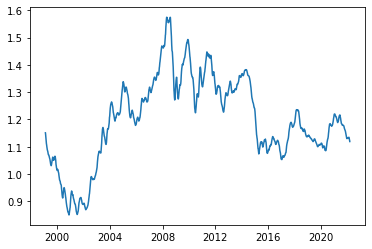

In [5]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.show()

**Building graph Euro-USD peak during financial crisis 2008:** 

Text(0.0, 1.0, 'Euro-USD exchange rates between 2006 and 2010')

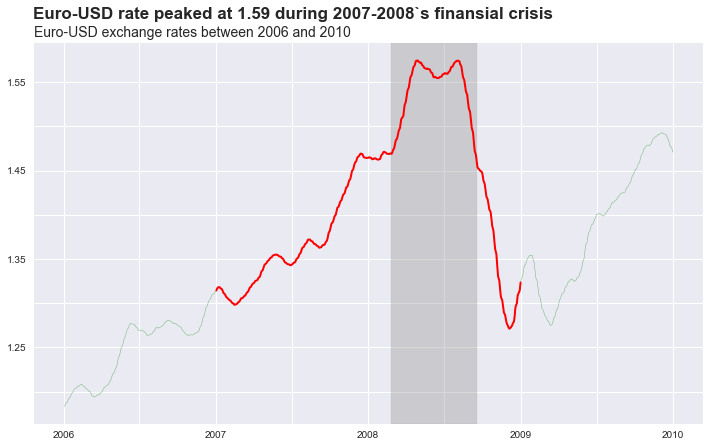

In [6]:
import matplotlib.style as style # Matplotlib submodule for pre-defined styling
import matplotlib.dates as mdates # To deal with dates (formating display of the DateTime objects on the x-axis)

# Separate data of the 2006-2010 period into unique dataframe
crisis_peak = euro_to_dollar[(euro_to_dollar['Time'] >= '2006') & (euro_to_dollar['Time'] <= '2010')]
#style.use('default')
style.use('seaborn')
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(crisis_peak['Time'], crisis_peak['rolling_mean'], linewidth=0.5, color='green', alpha=0.5)
ax.plot(crisis_peak['Time'][(crisis_peak['Time'] >= '2007') & (crisis_peak['Time'] <= '2009')], crisis_peak['rolling_mean'][(crisis_peak['Time'] >= '2007') & (crisis_peak['Time'] <= '2009')], linewidth=2, color='red')

ax.axvspan(13933, 14140, color='grey', alpha=0.3) # drawning grey 'crisis' rectangle

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y")) # Displaying only 'Years'

# Deleting duplicate tick labels with color settings
ax.get_xticklabels()[1].set_color("white")
ax.get_xticklabels()[3].set_color("white")
ax.get_xticklabels()[5].set_color("white")
ax.get_xticklabels()[7].set_color("white")

ax.get_yticklabels()[1].set_color("white")
ax.get_yticklabels()[3].set_color("white")
ax.get_yticklabels()[5].set_color("white")
ax.get_yticklabels()[7].set_color("white")

# Adding title & subtitle 
plt.suptitle('Euro-USD rate peaked at 1.59 during 2007-2008`s finansial crisis', weight='bold', x=0.425, y=0.952, size=17)
plt.title('Euro-USD exchange rates between 2006 and 2010', loc='left', size=14)

**Building graph Euro-USD under the last tree US presidents:** 

Text(11000, 0.73, '©DATAQUEST                                                                                                                                                                      Source: European Central Bank')

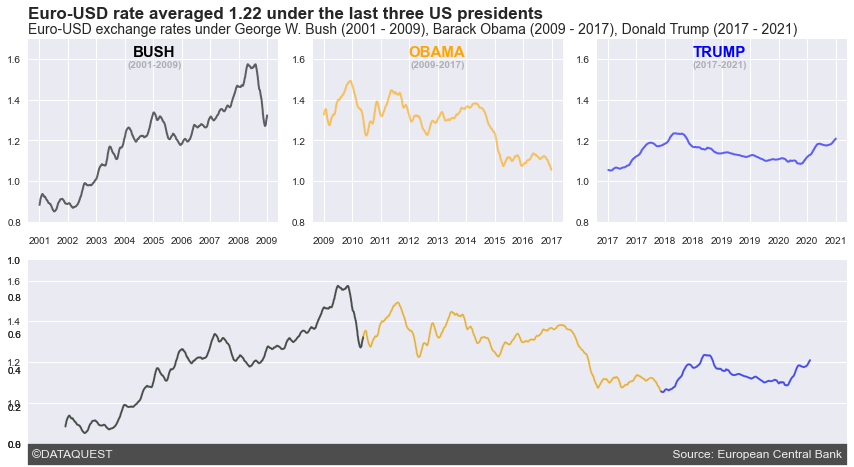

In [7]:
# Setting presidency intervals
bush = euro_to_dollar[(euro_to_dollar['Time'] >= '2001') & (euro_to_dollar['Time'] <= '2009')]
obama = euro_to_dollar[(euro_to_dollar['Time'] >= '2009') & (euro_to_dollar['Time'] <= '2017')]
trump = euro_to_dollar[(euro_to_dollar['Time'] >= '2017') & (euro_to_dollar['Time'] <= '2021')]
All = euro_to_dollar[(euro_to_dollar['Time'] >= '2001') & (euro_to_dollar['Time'] <= '2021')]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6)) # construct empty gird

gs = axs[1, 0].get_gridspec() # Module which specifies the location of the subplot in the figure


# remove the underlying axes
for i in axs[1, 0:]:
    i.remove()
    axbig = fig.add_subplot(gs[1, 0:])
    axbig.tick_params(
    axis='x',       # changes apply to the both-axis
    which='both',      # both major and minor ticks are affected
    reset=True,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False) # labels along the bottom edge are off

# Filling supplots with data
axs[0, 0].plot(bush['Time'], bush['rolling_mean'], linewidth=2, color='black', alpha=0.6)
axs[0, 1].plot(obama['Time'], obama['rolling_mean'], linewidth=2, color='orange', alpha=0.6)
axs[0, 2].plot(trump['Time'], trump['rolling_mean'], linewidth=2, color='blue', alpha=0.6)
axbig.plot(All['Time'], All['rolling_mean'], linewidth=0.5, color='green', alpha=0.6)
axbig.plot(bush['Time'], bush['rolling_mean'], linewidth=2, color='black', alpha=0.6)
axbig.plot(obama['Time'], obama['rolling_mean'], linewidth=2, color='orange', alpha=0.6)
axbig.plot(trump['Time'], trump['rolling_mean'], linewidth=2, color='blue', alpha=0.6)


axEs = [axs[0, 0], axs[0, 1], axs[0, 2], axbig] # Contain all axes into one itarable list

# Setting intervals & steps for y axis for all graphs
# Setting 'Year' format for x axis
for i in axEs:
    i.set_ylim([0.8, 1.7])
    start, end = i.get_ylim()
    i.yaxis.set_ticks(np.arange(start, end, 0.2))
    i.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    
axbig.set_xticks([])

axesTree = [axs[0, 0], axs[0, 1], axs[0, 2]]
for i in axesTree:
    i.tick_params(axis='x', pad=15)
       
fig.tight_layout()

# Adding title & subtitle to the figure
plt.suptitle('Euro-USD rate averaged 1.22 under the last three US presidents', weight='bold', x=0.3352, y=1.049, size=17)
plt.title('Euro-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009 - 2017), Donald Trump (2017 - 2021)', loc='left', y=2.205, size=14)

# Adding title & subtitle to subplots
axs[0, 1].text(11790, 1.612, 'BUSH', size=15, weight='bold',
        color='black')
axs[0, 1].text(11720, 1.56, '(2001-2009)', weight='bold',
         alpha=0.3)

axs[0, 1].text(15325, 1.612, 'OBAMA', size=15, weight='bold',
        color='orange')
axs[0, 1].text(15350, 1.56, '(2009-2017)', weight='bold',
         alpha=0.3)

axs[0, 2].text(17710, 1.612, 'TRUMP', size=15, weight='bold',
        color='blue')
axs[0, 2].text(17710, 1.56, '(2017-2021)', weight='bold',
         alpha=0.3)

# Adding a signature
axbig.text(11000, 0.73, '©DATAQUEST' + ' '*166 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=12)

![Image](https://regnum.ru/uploads/pictures/news/2018/01/22/regnum_picture_1516648408508944_normal.jpg)

**Ruble data:**

In [9]:
exchange_rates.rename(columns={'[Russian rouble ]': 'Russian rouble'}, inplace=True)
rub_to_dollar = exchange_rates[['Time', 'Russian rouble']]
rub_to_dollar.head()
rub_to_dollar['Russian rouble'].value_counts()

-           62
39.6750      4
35.2250      4
43.9800      4
40.6500      4
            ..
34.7170      1
34.6410      1
34.5840      1
34.6900      1
117.2010     1
Name: Russian rouble, Length: 5705, dtype: int64

In [11]:
rub_to_dollar = rub_to_dollar[rub_to_dollar['Russian rouble'] != '-']

rub_to_dollar['Russian rouble'] = rub_to_dollar['Russian rouble'].astype(float) #convert column to float dtype
rub_to_dollar.info()
rub_to_dollar['Russian rouble'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5945 entries, 0 to 6006
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            5945 non-null   datetime64[ns]
 1   Russian rouble  5932 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 139.3 KB


35.225     4
40.595     4
39.675     4
43.980     4
40.650     4
          ..
34.717     1
34.641     1
34.584     1
34.690     1
117.201    1
Name: Russian rouble, Length: 5704, dtype: int64

**Visualization:**

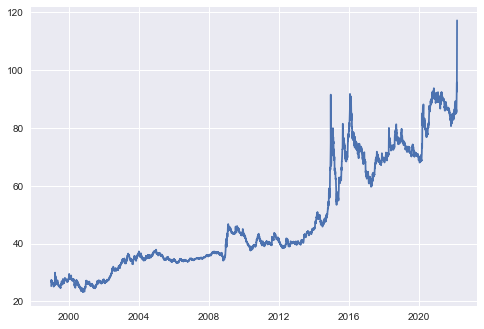

In [12]:
plt.plot(rub_to_dollar['Time'], rub_to_dollar['Russian rouble'])
plt.show()

**Adding column 'rolling_mean' to DataFrame with rolling window of 30 days:**

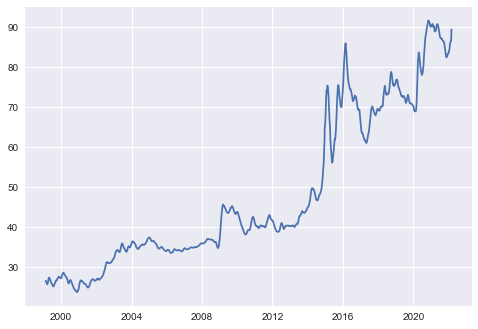

In [13]:
rub_to_dollar['rolling_mean'] = rub_to_dollar['Russian rouble'].rolling(30).mean()
plt.plot(rub_to_dollar['Time'], rub_to_dollar['rolling_mean'])
plt.show()

1825   2006-01-02
1826   2006-01-03
1827   2006-01-04
1828   2006-01-05
1829   2006-01-06
Name: Time, dtype: datetime64[ns]


Text(0.0, 1.0, 'RUB-USD exchange rate between 2006 and 2010')

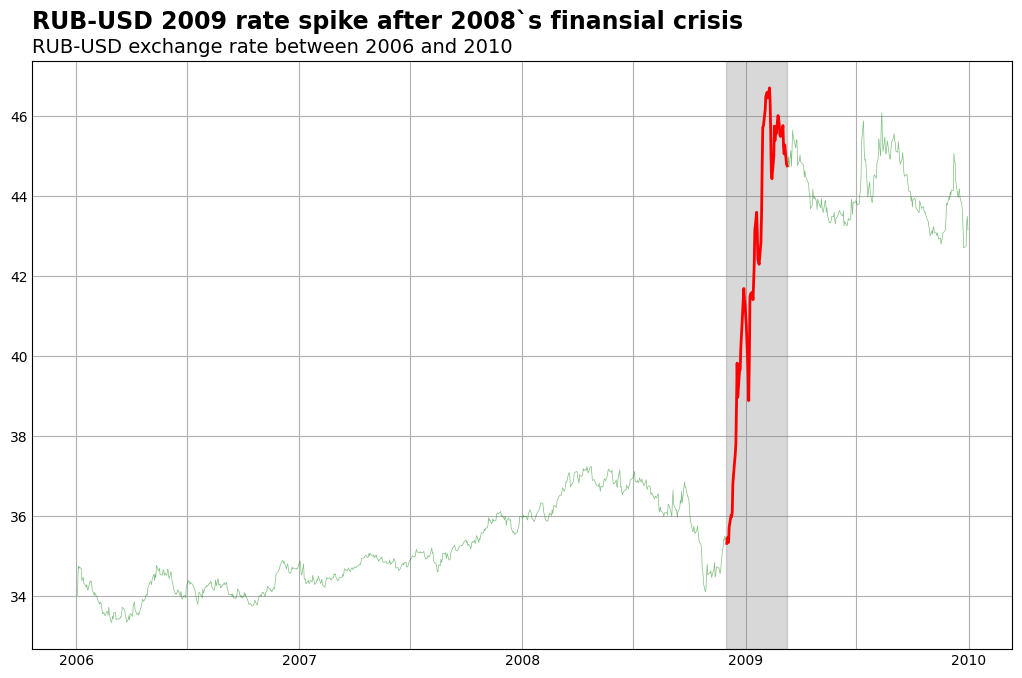

In [55]:
# Separate data of the 2006-2010 period into unique dataframe
crisis_peak = rub_to_dollar[(rub_to_dollar['Time'] >= '2006') & (rub_to_dollar['Time'] <= '2010')]
style.use('default')
style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(10,6))
print(crisis_peak['Time'].head())

ax.plot(crisis_peak['Time'], crisis_peak['Russian rouble'], linewidth=0.5, color='green', alpha=0.5)
ax.plot(crisis_peak['Time'][(crisis_peak['Time'] >= '2008-12-01') & (crisis_peak['Time'] <= '2009-03-10')], crisis_peak['Russian rouble'][(crisis_peak['Time'] >= '2008-12-01') & (crisis_peak['Time'] <= '2009-03-10')], linewidth=2, color='red')

ax.axvspan(14212, 14312, color='grey', alpha=0.3) # drawning grey 'crisis' rectangle

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y")) # Displaying only 'Years'

# Deleting duplicate tick labels with color settings
ax.get_xticklabels()[1].set_color("white")
ax.get_xticklabels()[3].set_color("white")
ax.get_xticklabels()[5].set_color("white")
ax.get_xticklabels()[7].set_color("white")



# Adding title & subtitle 
plt.suptitle('RUB-USD 2009 rate spike after 2008`s finansial crisis', weight='bold', x=0.365, y=1.076, size=17)
plt.title('RUB-USD exchange rate between 2006 and 2010', loc='left', size=14)